Ex_1

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

a) Prepare data

In [9]:
url_data = "https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data"
df = pd.read_csv(url_data, delimiter='\t')
df

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


b) Extract and normalize the explicative variables

In [10]:
variables = df.columns[1:9]
df[variables] = df[variables].apply(lambda x: (x - x.mean()) / x.std())

<!-- Is it wise to normalize these data? -->c) --> Yes it is because all the variables might be on the same scale

d) Split the dataset into training and test data

In [11]:
Y_train = df.loc[df["train"]=="T", 'lpsa'].to_numpy()
X_train = df.loc[df["train"]=="T", variables].to_numpy()
print("Training set : n = {} samples and p = {} dimensions".format(X_train.shape[0],X_train.shape[1]))
Y_test = df.loc[df["train"]=="F", 'lpsa'].to_numpy()
X_test = df.loc[df["train"]=="F", variables].to_numpy()
print("Test set : n = {} samples and p = {} dimensions".format(X_test.shape[0], X_test.shape[1]))

Training set : n = 67 samples and p = 8 dimensions
Test set : n = 30 samples and p = 8 dimensions


Compute the correlations of predictors in the prostate cancer data as presented Table 3.1

<Axes: >

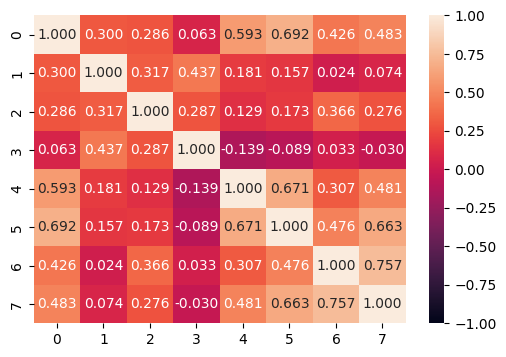

In [19]:
Xn = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
n, p = Xn.shape
C = Xn.T@Xn/n # on contrôle tout ce qu'on fait 
# or C = np.corrcoef(X_train.T) # par contre la fonction est compilée et on ne sait pas ce qui se fait
plt.figure(figsize=(6, 4))
sns.heatmap(C, annot=True, fmt=".3f", vmin=-1)


Reproduce the results presented Table 3.2 <br>
a) Compute the coefficients of the linear regression model, without using the lm function
(but you can use it validate your code)

In [21]:
X = np.concatenate((np.ones((X_train.shape[0],1)), X_train), axis=1)
b_ls = np.linalg.solve(X.T@X, X.T@Y_train) # Factorisation de cholesky
print(b_ls)

[ 2.46493292  0.67952814  0.26305307 -0.14146483  0.21014656  0.3052006
 -0.28849277 -0.02130504  0.26695576]


b) Compute the prediction error

In [28]:
n, p = X.shape
y_hat = X@b_ls
err = Y_train - y_hat

print(f"The size of the dataset or matrix X is ({n}x{p})")
print(f"The y predicted is --> {y_hat}")

The size of the dataset or matrix X is (67x9)
The y predicted is --> [0.75353858 0.70040498 0.44906559 0.55687338 1.700083   0.76462172
 2.23169054 1.46213549 0.95764547 2.01839575 1.77468627 1.85140133
 1.39943465 2.28081126 1.24066142 1.90227158 1.97740214 1.06025544
 2.56035833 2.19369936 2.25005272 1.94428706 2.14202486 1.97291915
 0.98846838 1.58796666 0.95575097 3.86245665 1.68493079 2.15305679
 2.12067165 2.45045739 2.62328973 4.09638    2.57075566 3.17981669
 3.06252822 2.39221612 2.30957586 2.89233974 2.52992457 2.93714431
 3.12648065 3.12713435 1.4759386  3.02721263 3.19521036 2.25589475
 3.33590171 3.44930283 3.50837247 3.59520175 3.30376434 2.11377357
 2.87284884 3.48312979 2.62355283 3.6956864  3.13189774 2.87004781
 4.09922459 3.36357643 3.43564731 4.14249256 3.77414281 4.44984337
 4.30839196]


c) Compute the standard error for each variable

In [30]:
sigma_square = np.dot(Y_train - y_hat, Y_train - y_hat)/(n-p)
vector_v = np.diag(np.linalg.inv(X.T@X))
std_error_coef = np.sqrt(sigma_square * vector_v)
print(std_error_coef)

[0.08931498 0.12662903 0.09562821 0.10134245 0.10221904 0.12360027
 0.15452934 0.14524723 0.15361357]


d) compute the Z score for each variable

In [32]:
z_score = b_ls/(std_error_coef)
print(f"z_score = {z_score}")

z_score = [27.59820312  5.36629046  2.75078939 -1.39590898  2.05584563  2.46925518
 -1.86691264 -0.14668121  1.73783972]


e) visualize the results and compare with table 3.2

In [33]:
dash = '-' * 50
print(dash)
print("{:<11s}{:<15s}{:<13s}{:<10s}".format("Term", "Coef", "Std. error","Z score"))
print(dash)
for k in range(variables.shape[0]+1):
    if k==0:
        print("{:<10s}{:>12.2f}{:>12.2f}{:>12.2f}".format("Intercept", b_ls[k], std_error_coef[k], z_score[k]))
    else:
        print("{:<10s}{:>12.2f}{:>12.2f}{:>12.2f}".format(variables[k-1], b_ls[k], std_error_coef[k], z_score[k]))
print(dash)

--------------------------------------------------
Term       Coef           Std. error   Z score   
--------------------------------------------------
Intercept         2.46        0.09       27.60
lcavol            0.68        0.13        5.37
lweight           0.26        0.10        2.75
age              -0.14        0.10       -1.40
lbph              0.21        0.10        2.06
svi               0.31        0.12        2.47
lcp              -0.29        0.15       -1.87
gleason          -0.02        0.15       -0.15
pgg45             0.27        0.15        1.74
--------------------------------------------------


Ex_3  MY TURN

In [34]:
def best_subset(X, Y):
    X_best = X[:, [1, 2]]
    b_best = np.linalg.solve(X_best.T@X_best, X_best.T@Y)
    return b_best

def ridge_regression_1(X, Y, lambda_):
    n, p = X.shape
    X_cent = X - X.mean()
    Y_cent = Y - Y.mean()
    I = np.eye(p)
    b_ridge = np.linalg.solve(X_cent.T@X_cent + lambda_*I, X_cent.T@Y_cent)
    intercept = Y.mean() - X.mean(0).T@b_ridge
    return b_ridge, intercept

def ridge_regression_2(X, Y, lambda_):
    n, p = X.shape
    I = np.eye(p)
    I[0,0] = 0
    b_ridge = np.linalg.solve(X.T@X + lambda_*I, X.T@Y)
    return b_ridge

In [35]:
best_subset_v = best_subset(X, Y_train)
print(best_subset_v)

[0.66741006 0.32346521]


In [37]:
ridge, best_inter= ridge_regression_1(X, Y_train, 24.25)
print(ridge)
print(best_inter)

[ 0.11726081  0.41758646  0.2362727  -0.04408531  0.15695477  0.22524404
 -0.00277149  0.03500725  0.13592439]
2.3457736898088157


In [38]:
ridge = ridge_regression_2(X, Y_train, 24.25)
print(ridge)

[ 2.46412081e+00  4.19663383e-01  2.38473028e-01 -4.74814079e-02
  1.61937494e-01  2.26666822e-01  9.23296891e-04  4.12268338e-02
  1.32083867e-01]


In [39]:
best_0 = np.sum(Y_train)/X.shape[0]
best_0

np.float64(2.4523450850746267)